<div align="center">
    <h1> Regression </h1>
</div>

In this notebook, I will implement basic regression algorithms from scratch.

## Table of Content
1. [Linear Regression](#linear)
2. [Polynomial Regression](#polynomial)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

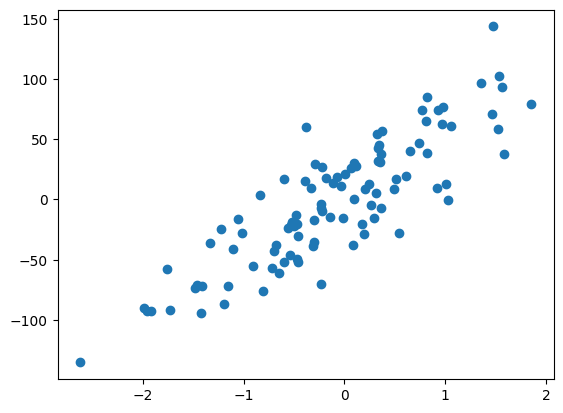

In [2]:
# Generate a dataset
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=30, random_state=42)

plt.scatter(X, y)
plt.show()

# Linear Regression

* Least Square Method
    * We consider the linear model $y = m \cdot x + b$.
    $$ m = \frac{n \cdot \sum(xy) - \sum(x) \cdot \sum(y)}{n \cdot \sum(x^2) - (\sum(x))^2} $$
    $$ b = \frac{\sum(y) - m \cdot \sum(x)}{n} $$
    where $n$ is the number of data points.

{'slope': np.float64(49.829309347009136), 'intercept': np.float64(3.4953459615809197)}


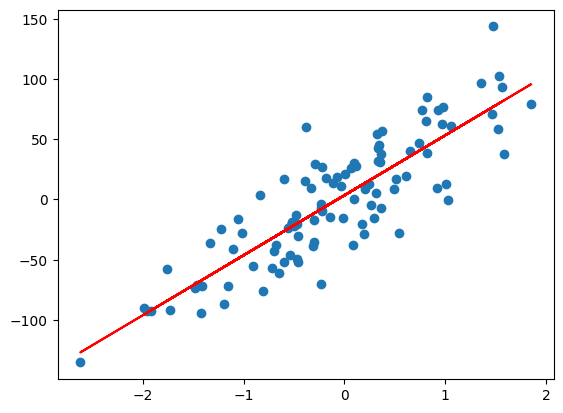

In [9]:
def least_squares(X, y):
    N = X.shape[0]
    m = N * np.sum(X.T * y) - np.sum(X) * np.sum(y)
    m /= N * np.sum(X**2) - np.sum(X)**2

    b = np.sum(y) - m * np.sum(X)
    b /= N

    return m, b

m, b = least_squares(X, y)
print({'slope': m, 'intercept': b})
plt.scatter(X, y)
plt.plot(X, m*X + b, color='red')
plt.show()

* Ordinary Least Square Method
    * We consider the linear model $y = X \cdot \beta + \epsilon$. Here, $X$ is the design matrix and $\beta$ is the parameter vector.
    * The objective is to minimize the sum of squared errors.
    $$ \hat{\beta} = (X^T X)^{-1} X^T y $$

Estimated betta: [49.39056071]


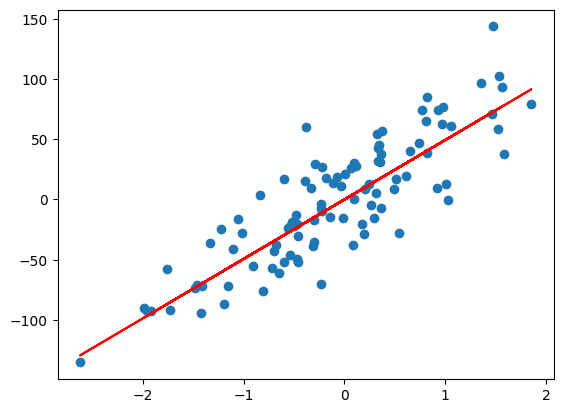

In [10]:
def ordinary_least_square(X, y):
    betta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    return betta_hat

betta_hat = ordinary_least_square(X, y)
print(f'Estimated betta: {betta_hat}')
plt.scatter(X, y)
plt.plot(X, X @ betta_hat, color='red')
plt.show()

## Polynomial Regression

{'numpy values': array([[-3.27965459e-08],
       [-1.25409343e-06],
       [ 5.05955062e-05]])}
{'polynomial_regression values': array([[-3.16023187e-08],
       [-1.28996061e-06],
       [ 5.10549668e-05]])}


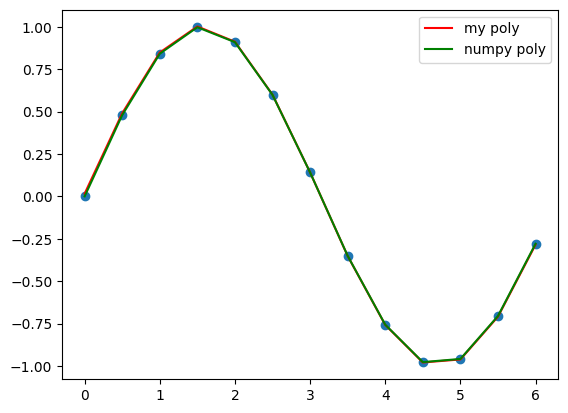

In [12]:
def polynomial_regression(X, y, degree=1):
    X_poly = np.zeros((X.shape[0], degree + 1))
    
    for i in range(degree + 1):
        X_poly[:, i] = X[:, 0]**i     

    betta_hat = ordinary_least_square(X_poly, y)
    return betta_hat, X_poly

# Generate a dataset from a sinusoide
X_poly = np.arange(0, 2*np.pi, 0.5).reshape(-1, 1)
y_poly = np.sin(X_poly)
degree = 10

betta_hat, X_poly_hat = polynomial_regression(X_poly, y_poly, degree)
numpy_poly = np.polyfit(X_poly[:, 0], y_poly, degree)

print({'numpy values' : numpy_poly[:3]})
print({'polynomial_regression values': np.flip(betta_hat)[:3]})

plt.scatter(X_poly, y_poly)
plt.plot(X_poly, X_poly_hat @ betta_hat, color='red', label='my poly')
plt.plot(X_poly, np.polyval(numpy_poly, X_poly[:, 0]), color='green', label='numpy poly')
plt.legend()
plt.show()

- Ridge Lasso Regression
- Decision Tree Regression
- Random Forest Regression
- SVM Regression
- Metrics